In [2]:
%load_ext autoreload
%autoreload 2
import pysegmentation
from pylab import *

In [2]:
cd notebook

[Errno 2] No such file or directory: 'notebook'
/media/veracrypt1/Diletta_lavoro/Postdoc/Data_analysis/pysegmentation/notebook


In [35]:
from pysegmentation.load_data import load_data_ml

name ="../../simunano/test_simuforks/learning_test"
X,y = load_data_ml(root=name,bin_size=100,read_size=256)

In [14]:
name ="../../simunano/test_forksvalid/learning_test"
X_valid,y_valid = load_data_ml(root=name,bin_size=100,read_size=256)

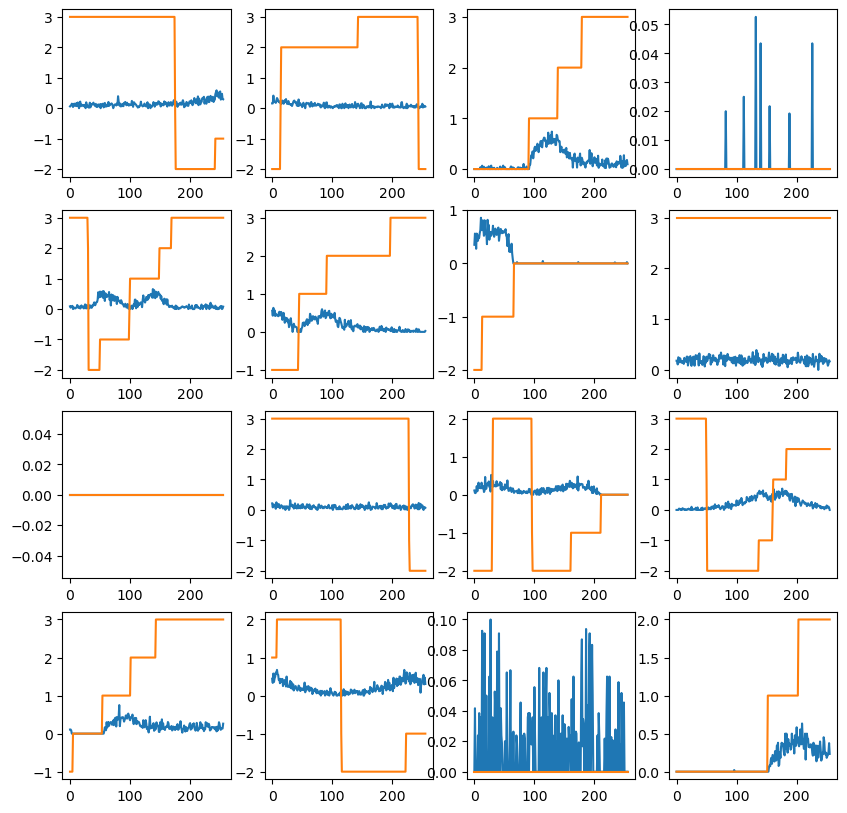

In [4]:
f=figure(figsize=(10,10))
for i in range(16):
    f.add_subplot(4,4,i+1)
    plot(X[i])
    plot(y[i])

/tmp/ipykernel_11868/3144457357.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4,4,i+1)


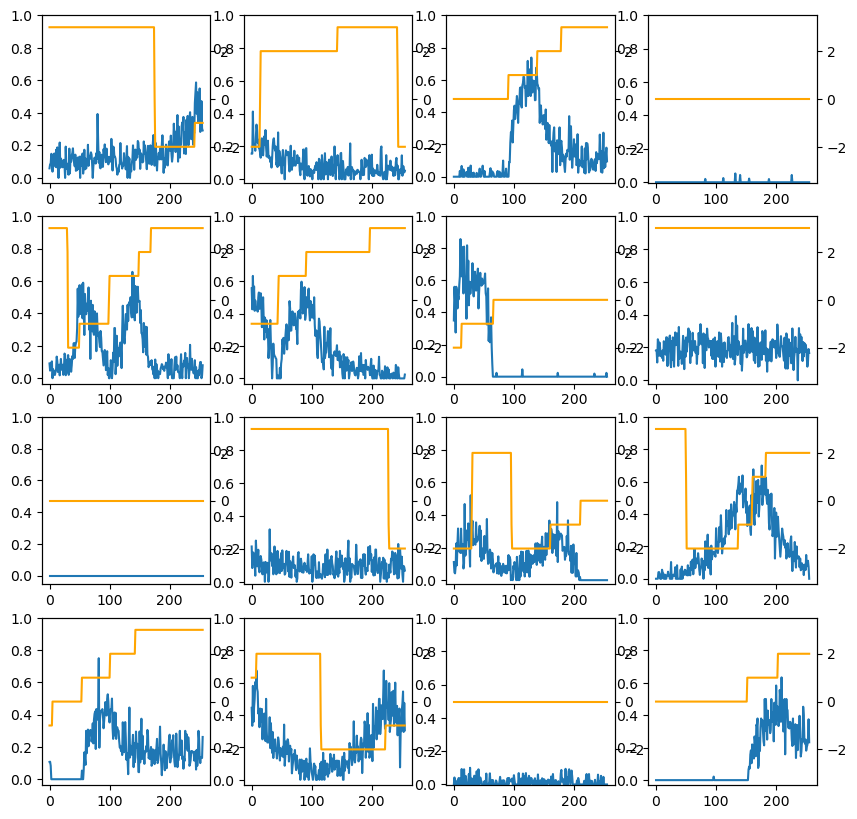

In [36]:

fig, ax = plt.subplots(figsize=(10,10))

for i in range(16):
    ax = plt.subplot(4,4,i+1)
    ax2 = ax.twinx()
    ax.plot(X[i])
    ax2.plot(y[i],color='orange')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)


In [17]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(f'All_forks.pdf')


for i in range(200):
    fig, ax = plt.subplots(figsize=(8,5))

    ax2 = ax.twinx()
    ax.plot(X[i])
    ax2.plot(y[i],color='orange')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    pdf.savefig(fig)
    plt.close(fig)
    
pdf.close()

In [6]:
from pysegmentation.models_light import LitUnet
from pysegmentation.datasets import Dataset1dto1d


md = Dataset1dto1d(X,y,nclasses=6)
model = LitUnet(16,kernel_size=5)

In [7]:
import torch.utils.data as data
import torch
train_set_size = int(len(md) * 0.8)
valid_set_size = len(md) - train_set_size

# split the train set into two
seed = torch.Generator().manual_seed(42)
train_set, valid_set = data.random_split(md, [train_set_size, valid_set_size], generator=seed)

In [8]:
from torch import utils
train_loader = utils.data.DataLoader(train_set,batch_size=8)
val_loader = utils.data.DataLoader(valid_set,batch_size=8)

In [9]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl

trainer = pl.Trainer(limit_train_batches=200, max_epochs=100,callbacks=[EarlyStopping(monitor="validation_loss", mode="min",patience=10)])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [10]:
trainer.fit(model=model, train_dataloaders=train_loader,val_dataloaders=val_loader)

Missing logger folder: /media/veracrypt1/Diletta_lavoro/Postdoc/Data_analysis/pysegmentation/notebook/lightning_logs

  | Name  | Type    | Params
----------------------------------
0 | model | UNET_1D | 69.9 K
----------------------------------
69.9 K    Trainable params
0         Non-trainable params
69.9 K    Total params
0.280     Total estimated model params size (MB)


/users/rce/ciardo/anaconda3/envs/pysegmentation/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/users/rce/ciardo/anaconda3/envs/pysegmentation/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  79%|███████████   | 77/97 [00:00<00:00, 81.65it/s, loss=1.77, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  79%|███████████   | 77/97 [00:00<00:00, 90.35it/s, loss=1.34, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 2:  79%|███████████   | 77/97 [00:00<00:00, 87.37it/s, loss=1.23, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 3:  79%|███████████▉   | 77/97 [00:00<00:00, 79.68it/s, loss=1.1, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 4:  79%|██████████▎  | 77/97 [00:00<00:00, 84.74it/s, loss=0.995, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 5:  79%|██████████▎  | 77/97 [00:00<00:00, 81.92it/s, loss=0.926, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 6:  79%|██████████▎  | 77/97 [00:01<00:00, 72.78it/s, loss=0.895, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 7:  79%|██████████▎  | 77/97 [00:01<00:00, 76.82it/s, loss=0.882, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 8:  79%|██████████▎  | 77/97 [00:01<00:00, 73.15it/s, loss=0.834, v_num=0]
Validation: 0it [00:00,

In [13]:
#Load from pretrained
#model = LitUnet.load_from_checkpoint("../first_test/lightning_logs/version_2/checkpoints/epoch=65-step=5544.ckpt")

In [22]:
pred=[]
Xs = []
ys=[]
for Xi, yi in val_loader:
    pred.append(torch.argmax(model.model(Xi),axis=1))
    Xs.append(Xi)
    ys.append(yi)
pred=torch.concat(pred)
Xs=torch.concat(Xs)
ys=torch.concat(ys)

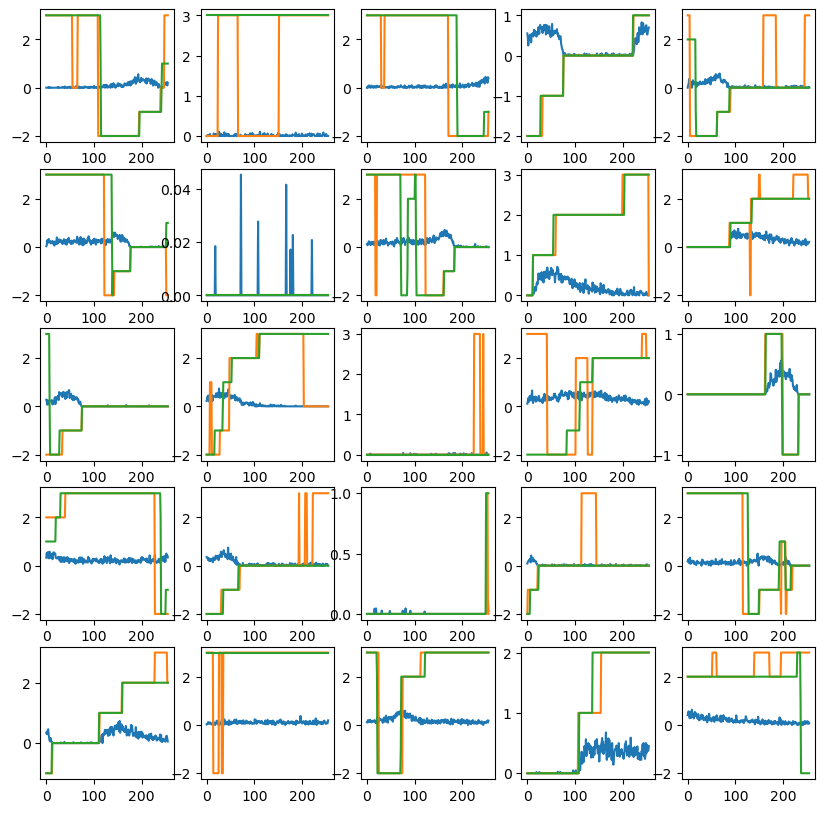

In [23]:
f=figure(figsize=(10,10))
for i in range(25):
    f.add_subplot(5,5,i+1)
    plot(Xs[i][0])
    plot(pred[i]-2)
    plot(ys[i]-2)

/tmp/ipykernel_11868/1820631517.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4,4,i+1)


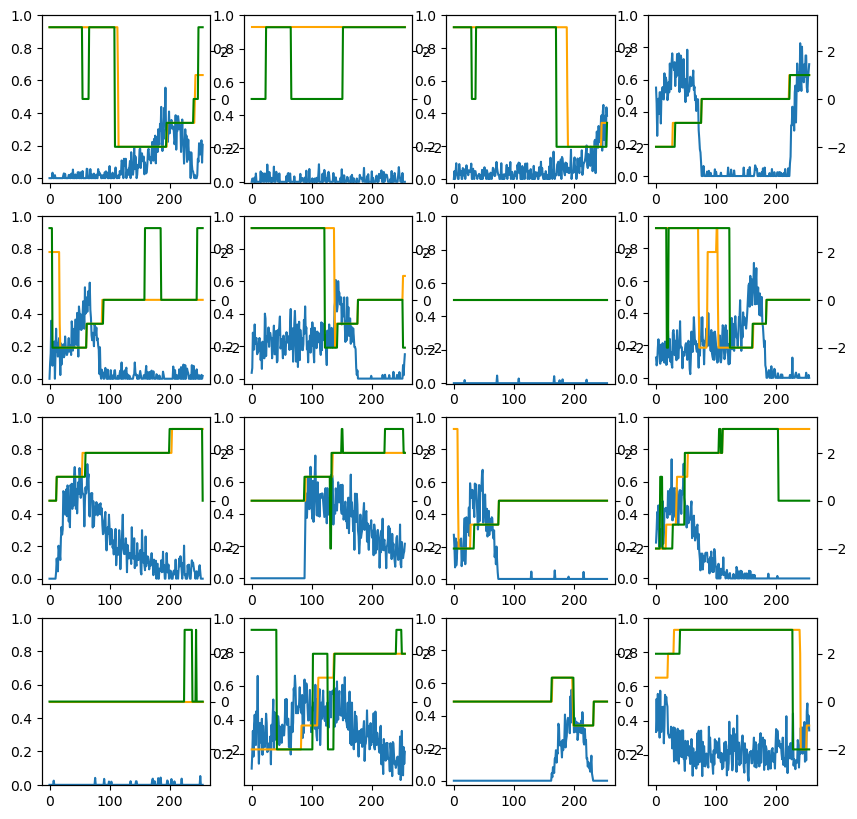

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

for i in range(16):
    ax = plt.subplot(4,4,i+1)
    ax2 = ax.twinx()
    ax.plot(Xs[i][0])
    ax2.plot(ys[i]-2,color='orange')
    ax2.plot(pred[i]-2,color='green')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)


In [26]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(f'All_forks_prediction.pdf')


for i in range(100):
    fig, ax = plt.subplots(figsize=(8,5))

    ax2 = ax.twinx()
    ax.plot(Xs[i][0])
    ax2.plot(ys[i]-2,color='orange')
    ax2.plot(pred[i]-2,color='green')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    pdf.savefig(fig)
    plt.close(fig)
    
pdf.close()

# Test on independent dataset

In [ ]:
md_valid = Dataset1dto1d(X_valid,y_valid,nclasses=6)
postval_loader = utils.data.DataLoader(md_valid,batch_size=8)

In [ ]:
pred_postvalid=[]
Xs_postvalid = []
ys_postvalid=[]
for Xi_postvalid, yi_postvalid in postval_loader:
    pred_postvalid.append(torch.argmax(model.model(Xi_postvalid),axis=1))
    Xs_postvalid.append(Xi_postvalid)
    ys_postvalid.append(yi_postvalid)
pred_postvalid=torch.concat(pred_postvalid)
Xs_postvalid=torch.concat(Xs_postvalid)
ys_postvalid=torch.concat(ys_postvalid)

/tmp/ipykernel_11868/792820985.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4,4,i+1)


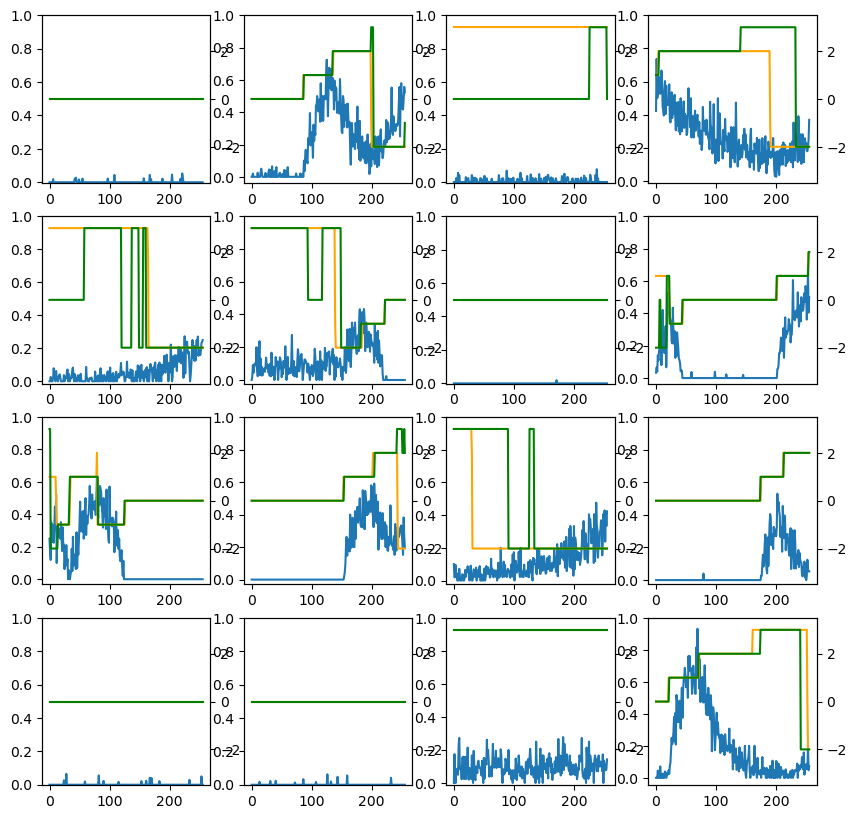

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

for i in range(16):
    ax = plt.subplot(4,4,i+1)
    ax2 = ax.twinx()
    ax.plot(Xs_postvalid[i][0])
    ax2.plot(ys_postvalid[i]-2,color='orange')
    ax2.plot(pred_postvalid[i]-2,color='green')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)


In [34]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(f'All_forks_postprediction.pdf')


for i in range(100):
    fig, ax = plt.subplots(figsize=(8,5))

    ax2 = ax.twinx()
    ax.plot(Xs_postvalid[i][0])
    ax2.plot(ys_postvalid[i]-2,color='orange')
    ax2.plot(pred_postvalid[i]-2,color='green')
    ax.set_ylim(ymax=0)
    ax.set_ylim(ymax=1)
    ax2.set_ylim(ymin=-3.5)
    ax2.set_ylim(ymax=3.5)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    pdf.savefig(fig)
    plt.close(fig)
    
pdf.close()